In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'eyesornot/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'eyesornot/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 893 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [3]:
# Mendapatkan daftar kelas beserta indeksnya
classes = train_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: else
Kelas 1: eyes


In [4]:
# Mendapatkan daftar kelas beserta indeksnya
classes = test_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: else
Kelas 1: eyes


# MobileNetV3

Epoch 1/10
28/28 [==============================] - 51s 2s/step - loss: 0.6935 - accuracy: 0.5487 - val_loss: 0.6873 - val_accuracy: 0.5475
Epoch 2/10
28/28 [==============================] - 44s 2s/step - loss: 0.6933 - accuracy: 0.5353 - val_loss: 0.6850 - val_accuracy: 0.5611
Epoch 3/10
28/28 [==============================] - 37s 1s/step - loss: 0.6901 - accuracy: 0.5398 - val_loss: 0.6846 - val_accuracy: 0.5475
Epoch 4/10
28/28 [==============================] - 36s 1s/step - loss: 0.6867 - accuracy: 0.5398 - val_loss: 0.6829 - val_accuracy: 0.5475
Epoch 5/10
28/28 [==============================] - 37s 1s/step - loss: 0.6846 - accuracy: 0.5913 - val_loss: 0.6776 - val_accuracy: 0.5566
Epoch 6/10
28/28 [==============================] - 38s 1s/step - loss: 0.6848 - accuracy: 0.5610 - val_loss: 0.6742 - val_accuracy: 0.5566
Epoch 7/10
28/28 [==============================] - 38s 1s/step - loss: 0.6802 - accuracy: 0.5666 - val_loss: 0.6746 - val_accuracy: 0.7059
Epoch 8/10
28/28 [==

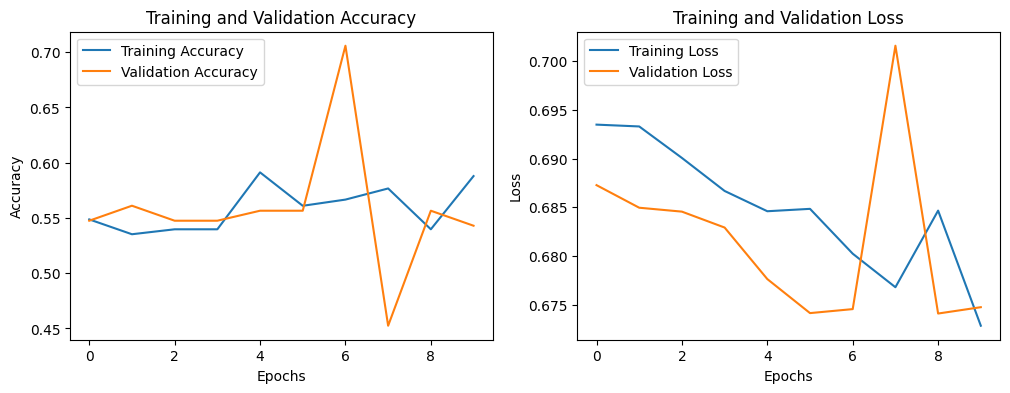

7/7 [==============================] - 6s 829ms/step - loss: 0.6748 - accuracy: 0.5430
Test Accuracy: 54.30%
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_2  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               73856     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1013105 (3.86 MB)
Trainable params: 73985 (289.00 KB)
Non-train

In [7]:
input_shape = (224, 224, 3)  


base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

modelV3Small = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


modelV3Small.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = modelV3Small.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = modelV3Small.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

modelV3Small.summary()

Epoch 1/10
28/28 [==============================] - 61s 2s/step - loss: 0.7430 - accuracy: 0.4961 - val_loss: 0.6867 - val_accuracy: 0.5475
Epoch 2/10
28/28 [==============================] - 52s 2s/step - loss: 0.7297 - accuracy: 0.5140 - val_loss: 0.6830 - val_accuracy: 0.5656
Epoch 3/10
28/28 [==============================] - 49s 2s/step - loss: 0.7257 - accuracy: 0.5162 - val_loss: 0.6799 - val_accuracy: 0.5792
Epoch 4/10
28/28 [==============================] - 48s 2s/step - loss: 0.7173 - accuracy: 0.5319 - val_loss: 0.6765 - val_accuracy: 0.5747
Epoch 5/10
28/28 [==============================] - 47s 2s/step - loss: 0.7147 - accuracy: 0.5196 - val_loss: 0.6721 - val_accuracy: 0.5837
Epoch 6/10
28/28 [==============================] - 46s 2s/step - loss: 0.7190 - accuracy: 0.5241 - val_loss: 0.6684 - val_accuracy: 0.5928
Epoch 7/10
28/28 [==============================] - 47s 2s/step - loss: 0.7047 - accuracy: 0.5431 - val_loss: 0.6655 - val_accuracy: 0.6063
Epoch 8/10
28/28 [==

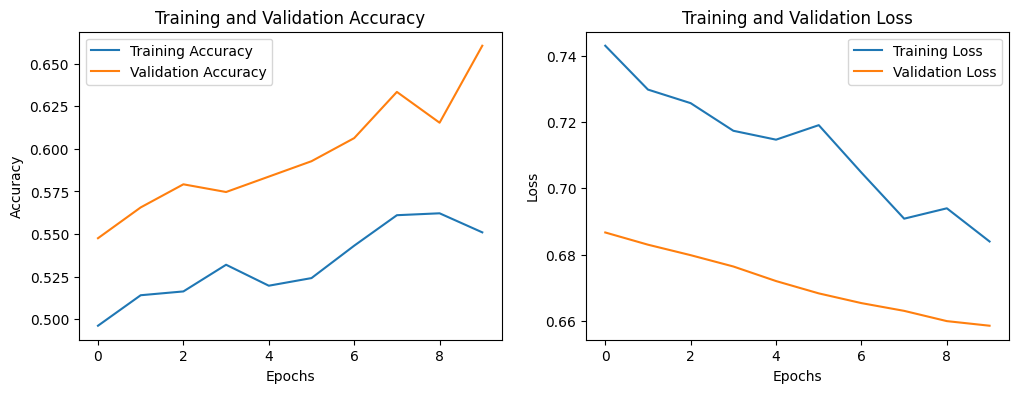

7/7 [==============================] - 7s 1s/step - loss: 0.6586 - accuracy: 0.6606
Test Accuracy: 66.06%
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_3  (None, 960)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               123008    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
              

In [8]:
input_shape = (224, 224, 3)  


base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

modelV3Large = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


modelV3Large.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history = modelV3Large.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = modelV3Large.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

modelV3Large.summary()

# MobileNetV2



Epoch 1/10


28/28 [==============================] - 55s 2s/step - loss: 0.5739 - accuracy: 0.7122 - val_loss: 0.2638 - val_accuracy: 0.9548
Epoch 2/10
28/28 [==============================] - 37s 1s/step - loss: 0.2568 - accuracy: 0.9115 - val_loss: 0.1564 - val_accuracy: 0.9683
Epoch 3/10
28/28 [==============================] - 40s 1s/step - loss: 0.1593 - accuracy: 0.9541 - val_loss: 0.1210 - val_accuracy: 0.9729
Epoch 4/10
28/28 [==============================] - 46s 2s/step - loss: 0.1326 - accuracy: 0.9552 - val_loss: 0.1024 - val_accuracy: 0.9729
Epoch 5/10
28/28 [==============================] - 43s 2s/step - loss: 0.1131 - accuracy: 0.9653 - val_loss: 0.0914 - val_accuracy: 0.9729
Epoch 6/10
28/28 [==============================] - 42s 2s/step - loss: 0.1000 - accuracy: 0.9686 - val_loss: 0.0858 - val_accuracy: 0.9729
Epoch 7/10
28/28 [==============================] - 44s 2s/step - loss: 0.0846 - accuracy: 0.9709 - val_loss: 0.0823 - val_accuracy: 0.9729
Epoch 8/10
28/28

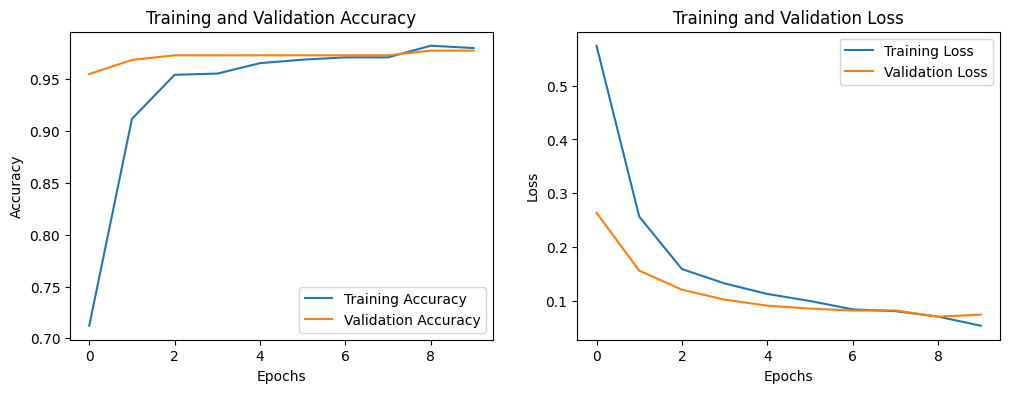

7/7 [==============================] - 7s 897ms/step - loss: 0.0747 - accuracy: 0.9774
Test Accuracy: 97.74%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
             

In [5]:
input_shape = (224, 224, 3)  


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

modelV2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


modelV2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history = modelV2.fit(
    train_generator,
    epochs=10, 
    validation_data=test_generator
)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = modelV2.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

modelV2.summary()

# VGG

58889256/58889256 [==============================] - 11s 0us/step


Epoch 1/10
28/28 [==============================] - 283s 10s/step - loss: 0.6174 - accuracy: 0.7951 - val_loss: 0.2065 - val_accuracy: 0.9367
Epoch 2/10
28/28 [==============================] - 271s 10s/step - loss: 0.1756 - accuracy: 0.9351 - val_loss: 0.1012 - val_accuracy: 0.9774
Epoch 3/10
28/28 [==============================] - 272s 10s/step - loss: 0.1242 - accuracy: 0.9563 - val_loss: 0.0640 - val_accuracy: 0.9819
Epoch 4/10
28/28 [==============================] - 277s 10s/step - loss: 0.1232 - accuracy: 0.9686 - val_loss: 0.0545 - val_accuracy: 0.9819
Epoch 5/10
28/28 [==============================] - 282s 10s/step - loss: 0.0843 - accuracy: 0.9664 - val_loss: 0.0551 - val_accuracy: 0.9774
Epoch 6/10
28/28 [==============================] - 291s 10s/step - loss: 0.0696 - accuracy: 0.9765 - val_loss: 0.0680 - val_accuracy: 0.9774
Epoch 7/10
28/28 [==============================] - 292s 10s/step - loss: 0.0739 - accuracy: 0.9686 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 

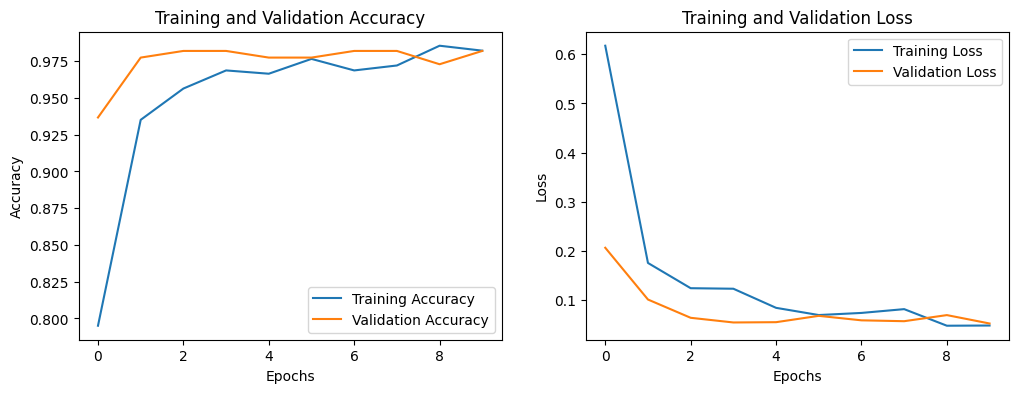

7/7 [==============================] - 58s 8s/step - loss: 0.0525 - accuracy: 0.9819
Test Accuracy: 98.19%
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 3211521 (12.25 MB)
Non-trai

In [11]:
from tensorflow.keras.applications import VGG16

input_shape = (224, 224, 3)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


modelvgg = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

modelvgg.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


history = modelvgg.fit(
    train_generator,
    epochs=10,  
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = modelvgg.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

modelvgg.summary()

# Input User

In [40]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Membuat widget upload file
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Menampilkan widget
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

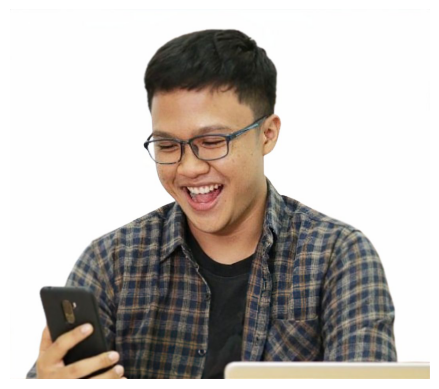

In [41]:
# Mengambil gambar dari widget upload
image = Image.open(io.BytesIO(uploader.data[0]))

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array numpy
image_array = np.array(image.resize((224, 224))) / 255.0  # Mengubah ukuran dan normalisasi
image_array = np.expand_dims(image_array, axis=0)  # Menambahkan dimensi batch

In [42]:
# Melakukan prediksi
prediction = modelvgg.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas mata")
else:
    print("Gambar tersebut diprediksi masuk kelas lainnya")

1/1 [==============================] - 0s 235ms/step
Gambar tersebut diprediksi masuk kelas lainnya


In [43]:
# Melakukan prediksi
prediction = modelV2.predict(image_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas mata")
else:
    print("Gambar tersebut diprediksi masuk kelas lainnya")

1/1 [==============================] - 0s 75ms/step
Gambar tersebut diprediksi masuk kelas lainnya


# Export

In [6]:
# Menyimpan model dalam format H5
modelV2.save('modelV2.h5')


D:\anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
import pickle

# Menyimpan model dalam format Pickle
with open('modelV2.pkl', 'wb') as f:
    pickle.dump(modelV2, f)


In [8]:
import tensorflow as tf

# Menyimpan model dalam format TensorFlow SaveModel
tf.saved_model.save(modelV2, 'modelV2_tf')


INFO:tensorflow:Assets written to: modelV2_tf\assets


INFO:tensorflow:Assets written to: modelV2_tf\assets


In [9]:
import json

# Mendapatkan struktur model sebagai JSON
model_json = modelV2.to_json()

# Menyimpan struktur model sebagai file JSON
with open("modelV2.json", "w") as json_file:
    json_file.write(model_json)
